<a href="https://colab.research.google.com/github/CA683-Group99/Wind-Energy-Prediction/blob/main/4_IslandElectricity_autoreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
! pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [226]:
import pandas as pd
import numpy as np
from matplotlib import pyplot


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [227]:
from statsmodels.tsa.ar_model import AutoReg

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
#newdf = pd.read_csv(r"C:\Users\E\Documents\IslandElectricity2017-2020.csv",index_col=0,parse_dates=[1])
oldfile = "/content/drive/MyDrive/CA683Project/IslandElectricity2017_2020v4.csv"
fileP = '/content/drive/MyDrive/CA683Project/IslandElectricityOnly2017_2020v3Clean.csv'

#newdf = pd.read_csv(fileP, index_col=0,parse_dates=[1])

fileP = '/content/drive/MyDrive/CA683Project/IslandElectricity2017_2020v3.csv'
newdf = pd.read_csv(fileP, parse_dates=[1], na_values=" ")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (90) have mixed types.Specify dtype option on import or set low_memory=False.



In [230]:
#newdf["ACTUAL GENERATION(MW)"].isnull().sum()
newdf.columns

Index(['Unnamed: 0', 'date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL',
       'ind.2_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       'msl_BEL', 'ind.3_BEL', 'wdsp_BEL', 'ind.4_BEL', 'wddir_BEL', 'ww_BEL',
       'w_BEL', 'sun_BEL', 'vis_BEL', 'clht_BEL', 'clamt_BEL', 'ind_DUB',
       'rain_DUB', 'ind.1_DUB', 'temp_DUB', 'ind.2_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'ind.3_DUB',
       'wdsp_DUB', 'ind.4_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB',
       'vis_DUB', 'clht_DUB', 'clamt_DUB', 'ind', 'rain', 'ind.1', 'temp',
       'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp',
       'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'ind_COR',
       'rain_COR', 'ind.1_COR', 'temp_COR', 'ind.2_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'ind.3_COR',
       'wdsp_COR', 'ind.4_COR', 'wddir_COR', 'ww_COR', 'w_COR', 'sun_COR',
       'vis_COR', 'clht_COR', 'clamt_COR', 'Unn

In [231]:
newdf.wdsp.isnull().sum()

0

In [232]:
newdf.loc[newdf.ActualDemandMW.isnull() == True]

,Unnamed: 0,date,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,msl_BEL,ind.3_BEL,wdsp_BEL,ind.4_BEL,wddir_BEL,ww_BEL,w_BEL,sun_BEL,vis_BEL,clht_BEL,clamt_BEL,ind_DUB,rain_DUB,ind.1_DUB,temp_DUB,ind.2_DUB,wetb_DUB,dewpt_DUB,vappr_DUB,rhum_DUB,msl_DUB,ind.3_DUB,wdsp_DUB,ind.4_DUB,wddir_DUB,ww_DUB,w_DUB,sun_DUB,vis_DUB,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,ind_COR,rain_COR,ind.1_COR,temp_COR,ind.2_COR,wetb_COR,dewpt_COR,vappr_COR,rhum_COR,msl_COR,ind.3_COR,wdsp_COR,ind.4_COR,wddir_COR,ww_COR,w_COR,sun_COR,vis_COR,clht_COR,clamt_COR,Unnamed: 0.1,ActualDemandMW,ForecastWndMW,ActualWindMW,ActualGenerationMW,NetTotal_MW,WindMWPercent,hour,isweekday,month,year
32136,32136,2021-03-01,0,0.0,0,2.5,0,2.0,1.2,6.7,91,1033.5,2,3,2,80,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0,0.1,0,0.0,-0.2,NaN,NaN,1034.9,2,4,2,90.0,2,11,0.0,12000,...,2,2,120,2,11,0.0,20000,999,0,3,0.0,0,4.1,5,-49.0,2.0,NaN,NaN,1032.7,2,8,2,50,2,11,0.0,20000.0,999,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
newdf = newdf.loc[newdf.ActualDemandMW.isnull() == False]

In [234]:
newdf.ActualWindMW.isnull().sum()

0

## Cleaned data: NO NEED TO Forward fill any missing data

In [235]:
#newdf.ActualWindMW.fillna(method='ffill', inplace=True)

#newdf.ActualDemandMW.fillna(method='ffill', inplace=True)

# adfuller tests

In [236]:
X=newdf.ActualWindMW


In [237]:
print('Shape of data',newdf.shape)
print('Original dataset',newdf.head())
print('After extracting only AR attribute',X)

Shape of data (32136, 93)
Original dataset    Unnamed: 0                date  ind_BEL  ...  isweekday  month    year
0           0 2017-07-01 00:00:00        0  ...      False    7.0  2017.0
1           1 2017-07-01 01:00:00        0  ...      False    7.0  2017.0
2           2 2017-07-01 02:00:00        0  ...      False    7.0  2017.0
3           3 2017-07-01 03:00:00        0  ...      False    7.0  2017.0
4           4 2017-07-01 04:00:00        0  ...      False    7.0  2017.0

[5 rows x 93 columns]
After extracting only AR attribute 0         280.25
1         423.25
2         451.25
3         512.75
4         576.75
          ...   
32131     571.75
32132     809.75
32133     976.75
32134    1039.25
32135    1034.00
Name: ActualWindMW, Length: 32136, dtype: float64


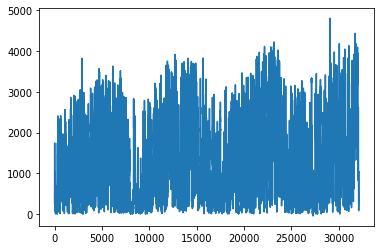

In [238]:
X.plot()

In [239]:
from statsmodels.tsa.stattools import adfuller

In [240]:
dftest = adfuller(newdf["ActualWindMW"], autolag = 'AIC')

print("ActualWindMW 1. ADF:",dftest[0])
print("2. P-Value",dftest[1])
print("3. No of Lags",dftest[2])
print("4. No of Observations used for ADF and Critical Value calc",dftest[3])
print("5. Critical Values",dftest[4])

ActualWindMW 1. ADF: -14.539785989042104
2. P-Value 5.168204455568921e-27
3. No of Lags 50
4. No of Observations used for ADF and Critical Value calc 32085
5. Critical Values {'1%': -3.430553828058282, '5%': -2.8616300867072115, '10%': -2.5668179503677324}


In [241]:
#correlation
# data.plot()

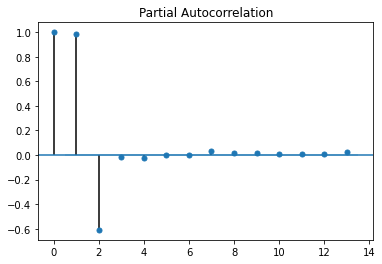

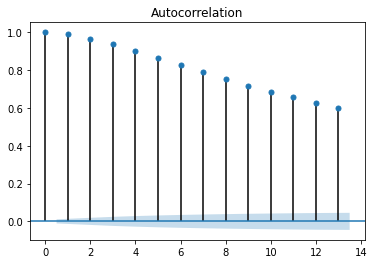

In [242]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(newdf['ActualWindMW'],lags=13, alpha=0.05)
acf=plot_acf(newdf['ActualWindMW'],lags=13)

In [243]:
dftest = adfuller(newdf["ActualDemandMW"], autolag = 'AIC')

print("ActualDemandMW 1. ADF:",dftest[0])
print("2. P-Value",dftest[1])
print("3. No of Lags",dftest[2])
print("4. No of Observations used for ADF and Critical Value calc",dftest[3])
print("5. Critical Values",dftest[4])

ActualDemandMW 1. ADF: -11.903395613426365
2. P-Value 5.507559509770569e-22
3. No of Lags 51
4. No of Observations used for ADF and Critical Value calc 32084
5. Critical Values {'1%': -3.4305538344117408, '5%': -2.8616300895151787, '10%': -2.5668179518623435}


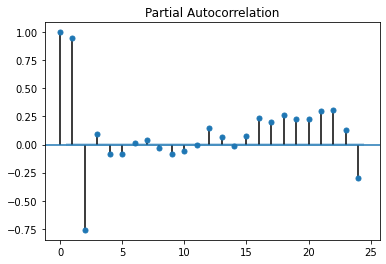

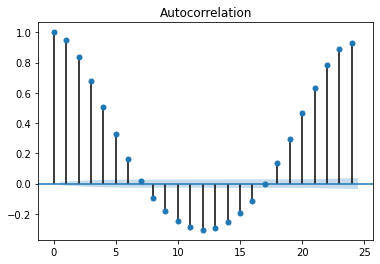

In [244]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(newdf['ActualDemandMW'],lags=24)
acf=plot_acf(newdf['ActualDemandMW'],lags=24)

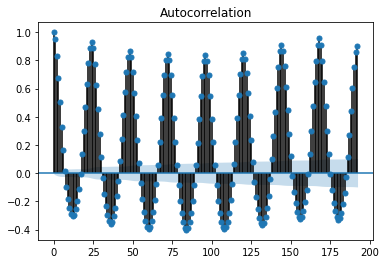

In [245]:
acf=plot_acf(newdf['ActualDemandMW'],lags=(8*24))

# Try to predict ActualWindMW

In [246]:
X=newdf.ActualWindMW
windSpeed=newdf.wdsp
#exog

In [247]:
train=X[:len(X)-24]
windSpeedTrain = windSpeed[:len(X)-24]

test=X[len(X)-24:]
windSpeedTest = windSpeed[len(X)-24:]

In [248]:
model=AutoReg(train, lags=13, exog=windSpeedTrain, old_names=True).fit()

In [249]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:                32112
Model:                  AutoReg-X(13)   Log Likelihood             -196810.007
Method:               Conditional MLE   S.D. of innovations            111.320
Date:                Fri, 19 Mar 2021   AIC                              9.426
Time:                        13:24:58   BIC                              9.430
Sample:                            13   HQIC                             9.427
                                32112                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            6.8710      1.337      5.139      0.000       4.251       9.491
ActualWindMW.L1      1.5626      0.006    277.405      0.000       1.552       1.574
ActualWindMW.L2     -0.5977 

In [250]:
print(len(train))

32112


In [251]:
pred=model.predict(start=len(train), end=len(X)-1, dynamic=False, exog=windSpeedTrain, exog_oos=windSpeedTest)

In [252]:
len(train),len(X)-1 ,  len(pred)

(32112, 32135, 24)

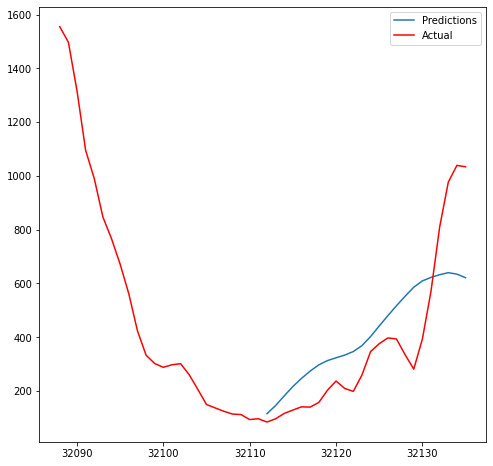

In [253]:
import matplotlib.pyplot as plt

actual=X[len(X)-48:]

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(pred, label="Predictions")
plt.plot(actual,color='red', label="Actual")

plt.legend()
plt.show()
#print(pred)

In [254]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("RMSE: ", mean_squared_error(test, pred))
print('MAE:', mean_absolute_error(test, pred))

RMSE:  34597.56624111164
MAE: 151.62741292773524


In [255]:
model.pvalues.loc[model.pvalues > 0.05]

ActualWindMW.L5     0.058315
ActualWindMW.L8     0.360652
ActualWindMW.L9     0.329681
ActualWindMW.L10    0.854773
ActualWindMW.L11    0.303619
dtype: float64

## Autoreg test function without extra data 

In [256]:
def testAutoreg(X, testT, nLag, showGraph=False):
  train=X[:len(X)-(testT+24)]
  test=X[len(X)-(testT+24): len(X)-(testT)]
  print("Train: " + str(len(train)) + " Test: " + str(len(test)) + " Predict: " + str((len(X) - testT - 1) - len(train)))

  model=AutoReg(train,lags=nLag, old_names=True).fit()
  #print("pValues great than 0.05: " + str(model.pvalues.loc[model.pvalues > 0.05]))
  print("AIC: ", model.aic)
  pred=model.predict(start=len(train),end=(len(X) - testT - 1),dynamic=False)

  actual=X[len(X)-(testT+(7*24)): len(X)-(testT)]

  if (showGraph== True):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(pred, label="Predictions")
    plt.plot(actual,color='red', label="Actual")

    plt.legend()
    plt.show()

  print("RMSE: ", mean_squared_error(test, pred))
  print('MAE:', mean_absolute_error(test, pred))
  print('Train r2_score:', r2_score(test, pred))

  return pred


In [257]:
def weekPredictionAutoreg(X, nLag):
  weekPred = pd.Series()
  n = 7
  for testDay in range(n):
    dayPred = testAutoreg(X, testT=((n-testDay-1)*24), nLag=nLag)
    weekPred = weekPred.append(dayPred)

  # Plot week predictions
  actual=X[len(X)-((n+2)*24):]

  fig, ax = plt.subplots(figsize=(8,8))
  plt.plot(weekPred, label="Predictions")
  plt.plot(actual,color='red', label="Actual")

  plt.legend()
  plt.show()

  actualVal = X[len(X)-(n*24):]
  print("act: " + str(actualVal.shape) + " pred: " + str(weekPred.shape))
  print('Week MAE:', mean_absolute_error(actualVal, weekPred))
  print('Week RMSE:', np.sqrt(mean_squared_error(actualVal, weekPred))) 
  print('Week Train r2_score:', r2_score(actualVal, weekPred))

  return weekPred


## Last week test performance withOUT wind speed data

Train: 31968 Test: 24 Predict: 23
AIC:  9.440321671113184
RMSE:  2279071.942896521
MAE: 1191.7559685646554
Train r2_score: -1.992800067700089
Train: 31992 Test: 24 Predict: 23
AIC:  9.441107230902283
RMSE:  1576164.000652251
MAE: 1114.2562586472145
Train r2_score: -29.794605076256623
Train: 32016 Test: 24 Predict: 23
AIC:  9.441025925400423
RMSE:  114524.50491098735
MAE: 274.1865877189876
Train r2_score: 0.6424097341980433
Train: 32040 Test: 24 Predict: 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



AIC:  9.441225631963867
RMSE:  111244.43920625746
MAE: 272.1491964697412
Train r2_score: 0.2672640132430547
Train: 32064 Test: 24 Predict: 23
AIC:  9.441747119948467
RMSE:  386160.66161065944
MAE: 481.8162664485189
Train r2_score: -1.0972750635237176
Train: 32088 Test: 24 Predict: 23
AIC:  9.441727645044582
RMSE:  1047695.8713822573
MAE: 941.0920412437262
Train r2_score: -4.086626597552357
Train: 32112 Test: 24 Predict: 23
AIC:  9.441150800131409
RMSE:  77626.3489480301
MAE: 239.78129161922527
Train r2_score: 0.08836689970499723


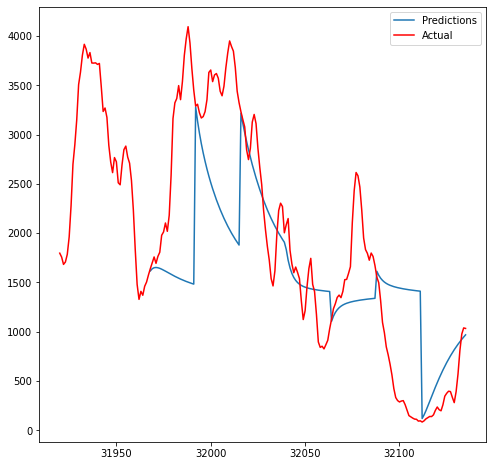

act: (168,) pred: (168,)
Week MAE: 645.0053729588669
Week RMSE: 893.8270661764311
Week Train r2_score: 0.43492032231342914


In [258]:
weekPred = weekPredictionAutoreg(newdf.ActualWindMW, nLag=5)

In [259]:
X_validPreds = newdf.copy()
X_validPreds['preds'] = weekPred
X_validPreds.tail()

weekValidPred = X_validPreds[-7*24:]


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))


fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.ActualWindMW,
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.preds,
                    mode='lines',
                    name='Pred',showlegend=True), 1, 1, secondary_y=False)

fig.show()

Train: 32112 Test: 24 Predict: 23
AIC:  9.441150800131409


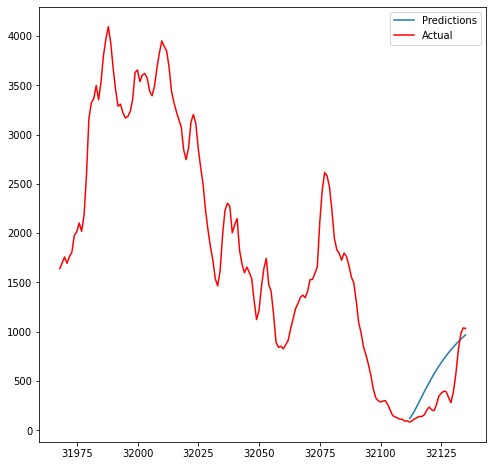

RMSE:  77626.3489480301
MAE: 239.78129161922527
Train r2_score: 0.08836689970499723


32112    120.886266
32113    156.522743
32114    199.020007
32115    245.453442
32116    293.786555
32117    342.619455
32118    391.019048
32119    438.375871
32120    484.302972
32121    528.566608
32122    571.038108
32123    611.660337
32124    650.424382
32125    687.353376
32126    722.491292
32127    755.895207
32128    787.629973
32129    817.764579
32130    846.369666
32131    873.515870
32132    899.272718
32133    923.707918
32134    946.886916
32135    968.872639
dtype: float64

In [260]:
testAutoreg(newdf.ActualWindMW, testT=0, nLag=5, showGraph=True)

In [261]:
testAutoreg(newdf.ActualWindMW, testT=0, nLag=(24))

Train: 32112 Test: 24 Predict: 23
AIC:  9.435901865115628
RMSE:  48147.22824462555
MAE: 200.90303520104658
Train r2_score: 0.4345656139947446


32112    124.672611
32113    160.956311
32114    195.686219
32115    233.853685
32116    271.898618
32117    312.814029
32118    353.361743
32119    391.956001
32120    426.760100
32121    458.442402
32122    489.796250
32123    521.325500
32124    553.412498
32125    585.610777
32126    614.982868
32127    640.906381
32128    663.241276
32129    684.838418
32130    705.933646
32131    726.060812
32132    745.409292
32133    762.771886
32134    779.540223
32135    796.865900
dtype: float64

In [262]:
testAutoreg(newdf.ActualWindMW, testT=24, nLag=(24))

Train: 32088 Test: 24 Predict: 23
AIC:  9.436465561068035
RMSE:  1239380.902461997
MAE: 1019.1403876083101
Train r2_score: -5.017268975818549


32088    1619.793803
32089    1588.383288
32090    1568.073597
32091    1539.838511
32092    1511.256726
32093    1495.921304
32094    1495.607982
32095    1492.496395
32096    1494.696697
32097    1494.167933
32098    1511.244119
32099    1537.372891
32100    1564.504625
32101    1582.746590
32102    1592.789841
32103    1592.639137
32104    1580.974392
32105    1565.716550
32106    1552.546836
32107    1539.167619
32108    1533.092632
32109    1526.594935
32110    1516.439715
32111    1506.303186
dtype: float64

Try with shorter lag

In [263]:
model=AutoReg(train,lags=4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:           ActualWindMW   No. Observations:                32112
Model:                     AutoReg(4)   Log Likelihood             -197120.208
Method:               Conditional MLE   S.D. of innovations            112.207
Date:                Fri, 19 Mar 2021   AIC                              9.441
Time:                        13:25:00   BIC                              9.443
Sample:                             4   HQIC                             9.442
                                32112                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          23.7186      1.090     21.767      0.000      21.583      25.854
ActualWindMW.L1     1.5850      0.006    284.103      0.000       1.574       1.596
ActualWindMW.L2    -0.6047      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



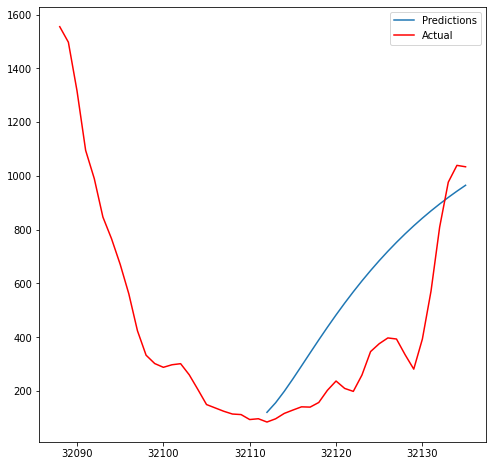

RMSE:  76661.30640991543
MAE: 238.66340012850185


In [264]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)

actual=X[len(X)-48:]

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(pred, label="Predictions")
plt.plot(actual,color='red', label="Actual")

plt.legend()
plt.show()


print("RMSE: ", mean_squared_error(test, pred))
print('MAE:', mean_absolute_error(test, pred))

## Autoreg test function with extra data (windspeed)

In [265]:
def testAutoregExog(X, wdsp, testT, nLag, showGraph=False):
  train=X[:len(X)-(testT+24)]
  wdspTrain = wdsp[:len(X)-(testT+24)]

  test=X[len(X)-(testT+24): len(X)-(testT)]
  wdspTest = wdsp[len(X)-(testT+24): len(X)-(testT)]

  print("Train: " + str(len(train)) + " Test: " + str(len(test)) + " Predict: " + str((len(X) - testT - 1) - len(train)))

  model=AutoReg(train, lags=nLag, exog=wdspTrain, old_names=True).fit()
  #print("pValues great than 0.05: " + str(model.pvalues.loc[model.pvalues > 0.05]))
  print("AIC: ", model.aic)
  pred=model.predict(start=len(train), end=(len(X) - testT - 1), dynamic=False, exog=wdspTrain, exog_oos=wdspTest)

  actual=X[len(X)-(testT+(7*24)): len(X)-(testT)]

  if (showGraph == True):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(pred, label="Predictions")
    plt.plot(actual,color='red', label="Actual")

    plt.legend()
    plt.show()

  print("RMSE: ", mean_squared_error(test, pred))
  print('MAE:', mean_absolute_error(test, pred))
  print('Train r2_score:', r2_score(test, pred))

  return pred


Train: 32112 Test: 24 Predict: 23
AIC:  9.427803231333309


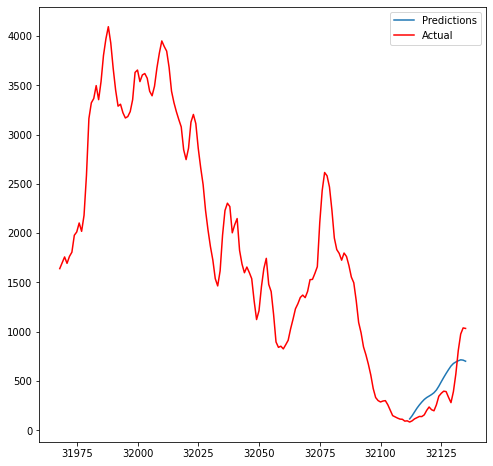

RMSE:  36346.03539895407
MAE: 167.55210858902453
Train r2_score: 0.5731571897531418


In [266]:
dayPred = testAutoregExog(newdf.ActualWindMW, wdsp=newdf.wdsp, testT=0, nLag=5, showGraph=True)

In [267]:
def weekPrediction(X, wdsp, nLag):
  weekPred = pd.Series()
  n = 7
  for testDay in range(n):
    dayPred = testAutoregExog(X, wdsp=wdsp, testT=((n-testDay-1)*24), nLag=nLag)
    weekPred = weekPred.append(dayPred)

  # Plot week predictions
  actual=X[len(X)-((n+2)*24):]

  fig, ax = plt.subplots(figsize=(8,8))
  plt.plot(weekPred, label="Predictions")
  plt.plot(actual,color='red', label="Actual")

  plt.legend()
  plt.show()

  actualVal = X[len(X)-(n*24):]
  print("act: " + str(actualVal.shape) + " pred: " + str(weekPred.shape))

  print('Week MAE:', mean_absolute_error(actualVal, weekPred))
  print('Week RMSE:', np.sqrt(mean_squared_error(actualVal, weekPred))) 
  print('Week Train r2_score:', r2_score(actualVal, weekPred))

  return weekPred


## Last week test performance with wind speed data

Train: 31968 Test: 24 Predict: 23
AIC:  9.426914507012306
RMSE:  2123327.212221453
MAE: 1206.2031005253573
Train r2_score: -1.7882813635139088
Train: 31992 Test: 24 Predict: 23
AIC:  9.427817545772392
RMSE:  711504.8539632452
MAE: 734.6696846395316
Train r2_score: -12.901161921329715
Train: 32016 Test: 24 Predict: 23
AIC:  9.427714260982357
RMSE:  183505.49410027
MAE: 333.15763074389946
Train r2_score: 0.4270241249902189
Train: 32040 Test: 24 Predict: 23
AIC:  9.4278824600485
RMSE:  96916.93068809756
MAE: 269.7782430791547
Train r2_score: 0.361635301971992
Train: 32064 Test: 24 Predict: 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



AIC:  9.428400862842938
RMSE:  515678.9866228572
MAE: 589.9571818072417
Train r2_score: -1.8007013322287238
Train: 32088 Test: 24 Predict: 23
AIC:  9.428395046169868
RMSE:  528673.6328431006
MAE: 672.2522360443664
Train r2_score: -1.5667423492816157
Train: 32112 Test: 24 Predict: 23
AIC:  9.427803231333309
RMSE:  36346.03539895407
MAE: 167.55210858902453
Train r2_score: 0.5731571897531418


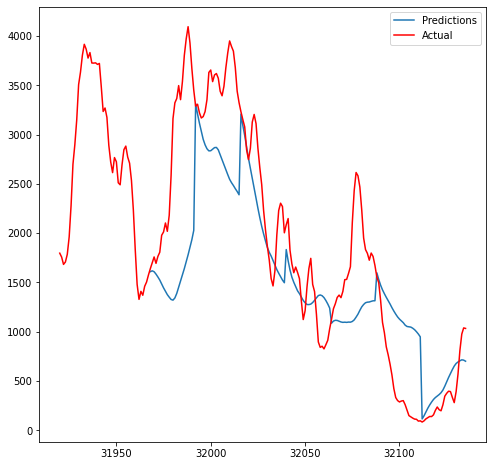

act: (168,) pred: (168,)
Week MAE: 567.6528836326537
Week RMSE: 774.2234031446311
Week Train r2_score: 0.5760298548842937


In [268]:
weekPred = weekPrediction(newdf.ActualWindMW, wdsp=newdf.wdsp, nLag=5)

Train: 31968 Test: 24 Predict: 23
AIC:  9.427229531112841
RMSE:  2119281.8131415932
MAE: 1207.4390264701885
Train r2_score: -1.782969082487496
Train: 31992 Test: 24 Predict: 23
AIC:  9.428123396611921
RMSE:  647515.3626281741
MAE: 694.7314106561611
Train r2_score: -11.650955017810404
Train: 32016 Test: 24 Predict: 23
AIC:  9.428011893348717
RMSE:  163719.81862988544
MAE: 319.37504147094336
Train r2_score: 0.48880273696522936
Train: 32040 Test: 24 Predict: 23
AIC:  9.428155895290795
RMSE:  98217.984844514
MAE: 270.15515725263816
Train r2_score: 0.3530656223733699
Train: 32064 Test: 24 Predict: 23
AIC:  9.428675258466097
RMSE:  526166.7313786418
MAE: 598.3122819849405
Train r2_score: -1.8576612655817626
Train: 32088 Test: 24 Predict: 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



AIC:  9.428659367680964
RMSE:  535866.9569407344
MAE: 676.3413596706877
Train r2_score: -1.6016663712991543
Train: 32112 Test: 24 Predict: 23
AIC:  9.42807010035142
RMSE:  34798.489203716235
MAE: 160.72729469755646
Train r2_score: 0.5913313581242308


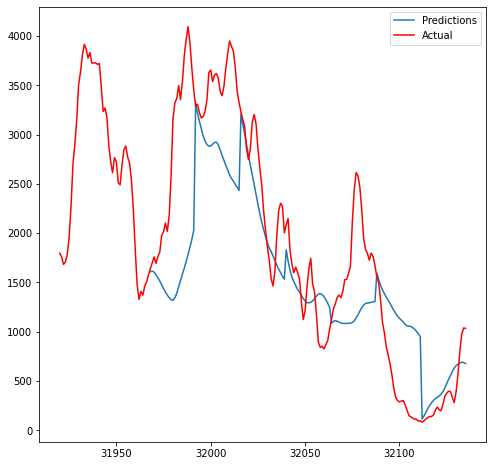

act: (168,) pred: (168,)
Week MAE: 561.0116531718737
Week RMSE: 767.7022448065636
Week Train r2_score: 0.5831418404006299


In [269]:
weekPred = weekPrediction(newdf.ActualWindMW, wdsp=newdf.wdsp, nLag=2)


In [270]:
X_validPreds = newdf.copy()
X_validPreds['preds'] = weekPred
X_validPreds.tail()

weekValidPred = X_validPreds[-7*24:]


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))


fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.ActualWindMW,
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.preds,
                    mode='lines',
                    name='Pred',showlegend=True), 1, 1, secondary_y=False)

fig.update_layout(
    title_text="Wind actual (blue) vs. Predictions (red) for last data week")

fig.show()

# Try to predict Demand

In [271]:
X = newdf['ActualDemandMW']

train=X[:len(X)-24]
test=X[len(X)-24:]

model=AutoReg(train,lags=24).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:         ActualDemandMW   No. Observations:                32112
Model:                    AutoReg(24)   Log Likelihood             -199658.127
Method:               Conditional MLE   S.D. of innovations            121.908
Date:                Fri, 19 Mar 2021   AIC                              9.608
Time:                        13:25:02   BIC                              9.615
Sample:                            24   HQIC                             9.610
                                32112                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             47.4683      6.846      6.934      0.000      34.050      60.887
ActualDemandMW.L1      1.3461      0.005    252.675      0.000       1.336       1.357
ActualDemandMW.L2   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [272]:
model.aic

9.608154259940038

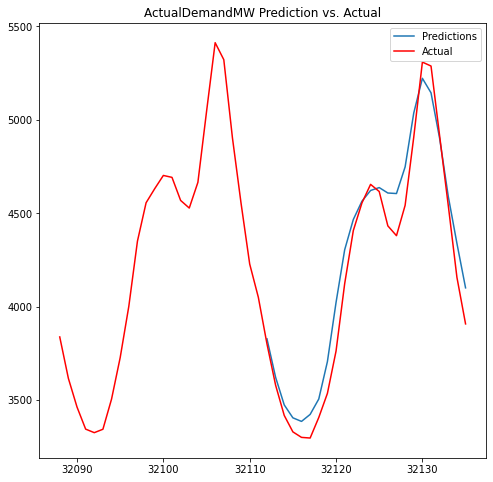

RMSE:  17545.335064925166
MAE: 110.4117962303086


In [273]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)


actual=X[len(X)-48:]

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(pred, label="Predictions")
plt.plot(actual,color='red', label="Actual")

plt.legend()
pyplot.title("ActualDemandMW Prediction vs. Actual")

plt.show()

print("RMSE: ", mean_squared_error(test, pred))
print('MAE:', mean_absolute_error(test, pred))

In [274]:
testAutoreg(newdf.ActualDemandMW, testT=0, nLag=24)

Train: 32112 Test: 24 Predict: 23
AIC:  9.608154259940038
RMSE:  17545.335064925166
MAE: 110.4117962303086
Train r2_score: 0.9540873391633694


32112    3827.498243
32113    3621.706035
32114    3473.781219
32115    3404.715778
32116    3385.488123
32117    3422.934513
32118    3505.368547
32119    3705.660815
32120    4022.278536
32121    4304.326513
32122    4466.443290
32123    4564.385535
32124    4621.783372
32125    4637.307893
32126    4608.284148
32127    4605.430395
32128    4747.963054
32129    5036.476236
32130    5222.249835
32131    5144.609101
32132    4899.746359
32133    4589.582293
32134    4338.643672
32135    4100.496936
dtype: float64

In [275]:
testAutoreg(newdf.ActualDemandMW, testT=(8*24), nLag=(8*24))

Train: 31920 Test: 24 Predict: 23
AIC:  8.72181024051052
RMSE:  15056.595091046906
MAE: 95.80459253920127
Train r2_score: 0.9653098353830091


31920    3910.619065
31921    3693.306937
31922    3525.734216
31923    3417.083444
31924    3375.544709
31925    3360.187538
31926    3477.584830
31927    3726.526534
31928    3993.964230
31929    4375.719322
31930    4707.691085
31931    4954.838290
31932    5144.356617
31933    5156.887156
31934    5027.261793
31935    4944.109720
31936    5010.025857
31937    5344.636804
31938    5582.507898
31939    5278.885056
31940    4874.191591
31941    4520.959987
31942    4175.248185
31943    3991.788391
dtype: float64

In [276]:
testAutoreg(newdf.ActualDemandMW, testT=(8*24), nLag=(24))

Train: 31920 Test: 24 Predict: 23
AIC:  9.61076800574159
RMSE:  159050.46722570198
MAE: 340.0404928557843
Train r2_score: 0.6335501581131198


31920    3934.879671
31921    3742.487552
31922    3608.040998
31923    3555.285961
31924    3572.928152
31925    3664.101945
31926    3903.136772
31927    4291.976509
31928    4729.060998
31929    5022.540689
31930    5201.928288
31931    5303.007190
31932    5370.234539
31933    5382.282093
31934    5325.666588
31935    5236.777046
31936    5273.548250
31937    5481.546380
31938    5527.742010
31939    5360.154859
31940    5071.659496
31941    4723.946820
31942    4450.880498
31943    4192.408526
dtype: float64